In [1]:
import sys
sys.path.insert(1,'../..')
import learnHeat as lh
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of edges in each weight bin')

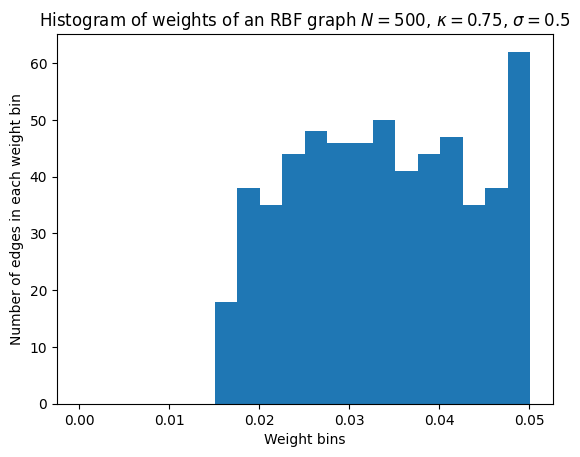

In [20]:
G = lh.heat_graph_RBF(40,kappa=0.75,sigma=0.5)
v = lh.laplacian_to_vec(G)
plt.hist(v[v!=0],bins=20,range=[0,max(v)])
plt.title(r"Histogram of weights of an RBF graph $N=500$, $\kappa=0.75$, $\sigma=0.5$")
plt.xlabel("Weight bins")
plt.ylabel("Number of edges in each weight bin")

In [18]:
tau = [0.5,1,2.5,4]
X = lh.create_deltas(G,tau)

In [19]:
res = lh.learn_heat(X,tau0=tau,alpha=0.01,beta=0.1,max_iter=50)

Text(0.5, 0, 'Weight bins')

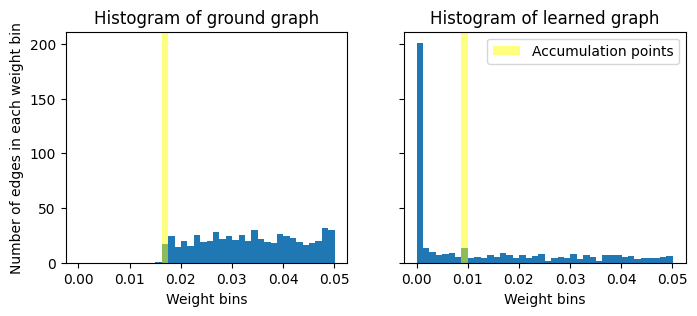

In [46]:
L = res["L"]

vec=lh.laplacian_to_vec(L)
fig, ax = plt.subplots(1,2,figsize=(8,3),sharey=True)
n,bins, _  = ax[0].hist(v[v!=0],bins=40,range=[0,max(v)])
highlighted_bin_index = 13
ax[0].axvspan(bins[highlighted_bin_index], bins[highlighted_bin_index+1], facecolor='yellow', alpha=0.5)
highlighted_bin_label = 'Accumulation point'
ax[0].set_title(r"Histogram of ground graph")
ax[0].set_xlabel("Weight bins")
ax[0].set_ylabel("Number of edges in each weight bin")
n,bins, _  = ax[1].hist(vec[vec!=0],bins=40,range=[0,max(v)])
highlighted_bin_index = 7
plt.axvspan(bins[highlighted_bin_index], bins[highlighted_bin_index+1], facecolor='yellow', alpha=0.5)
highlighted_bin_label = 'Accumulation points'
ax[1].legend([highlighted_bin_label])
ax[1].set_title(r"Histogram of learned graph")
ax[1].set_xlabel("Weight bins")


In [ ]:
L = res["L"]
vec=lh.laplacian_to_vec(G)
fig, ax = plt.subplots(1,2,figsize=(8,3),sharey=True)
bins = [100,20]

for i in range(2):
    ax[i].set_xlabel("Graph weights")
    ax[i].hist(vec,bins=bins[i])
    ax[i].set_title(f"{bins[i]} partitions")
ax[0].set_ylabel("Number of edges by partition")


In [ ]:
vec2=lh.laplacian_to_vec(lh.heat_persistent(L,1000))
L = res["L"]
fig, ax = plt.subplots(1,2,figsize=(8,3),sharey=True)
bins = [100,200]
for i in range(2):
    ax[i].set_xlabel("Graph weights")
    ax[i].hist(vec2[vec2!=0],bins=bins[i])
    ax[i].set_title(f"{bins[i]} partitions")
plt.suptitle("After filter")
ax[0].set_ylabel("Number of edges by partition")

### Moving window

In [ ]:
G = lh.heat_graph_RBF(20)
tau = [0.5,1,2.5,4]
X = lh.create_deltas(G,tau)
res = lh.learn_heat(X,tau0=tau,alpha=0.01,beta=0.1,max_iter=50)
L = res["L"]


In [ ]:
G = lh.heat_graph_RBF(100)


In [ ]:
vec=lh.laplacian_to_vec(L)
vec = vec[vec!=0]
fig, ax = plt.subplots(1,3,figsize=(8,3),sharey=True)
bins = [100]

for i in range(3):
    ax[i].set_xlabel("Graph weights")
    n, _, patches = ax[i].hist(vec,100)
    for j in range(i*10+1,i*10 + 11):
        patches[j].set_facecolor('red')
    ax[i].set_title(f"{int(np.sum(n[i*10+1:i*10+11]))} weights in red")
ax[0].set_ylabel("Number of edges by partition")
fig.suptitle("Moving window of size 0.1", y=1.04)

In [ ]:
vec = np.sort(vec)

In [ ]:
import numpy as np
from scipy.signal import convolve

def convolve_with_rectangular(vector, window_size):
    # Create the rectangular window
    window = np.ones(window_size) / window_size
    
    # Perform the convolution
    result = convolve(vector, window, mode='same')
    
    return result

# Example usage
vector = np.array([0.2, 0.5, 0.8, 0.3, 0.1])
window_size = 20  # Adjust the size of the window as needed

convolution_result = convolve_with_rectangular(vec, window_size)
print(convolution_result)


In [ ]:
import numpy as np
from scipy.signal import convolve

def convolve_with_rectangular(vector, window_size):
    # Create the rectangular window
    window = np.ones(window_size) / window_size
    
    # Perform the convolution
    result = convolve(vector, window, mode='same')
    
    return result

# Example usage
vector = np.array([0.2, 0.5, 0.8, 0.3, 0.1])
window_size = 30  # Adjust the size of the window as needed

convolution_result2 = convolve_with_rectangular(vec, window_size)


In [ ]:

n, bins, _ = plt.hist(convolution_result,bins=200)
plt.title(r"Convoluted weights with window of 20 bins ($\omega=0.05$)")
highlighted_bin_index = 15
plt.axvspan(bins[highlighted_bin_index], bins[highlighted_bin_index+1], facecolor='yellow', alpha=0.5)
plt.xlabel("Graph weights")
highlighted_bin_label = f'Accumulation point ({bins[highlighted_bin_index]:.3f} - {bins[highlighted_bin_index+1]:.3f})'
plt.legend([highlighted_bin_label])
plt.ylabel("Number of edges by partition")
plt.show()